In [1]:
from sklearn.cluster import DBSCAN

In [2]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

클러스터 class: [0 1 2]
클러스터 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 2 2 0 0 0 0]
Estimated number of clusters: 3
Estimated number of noise points: 0

SNS


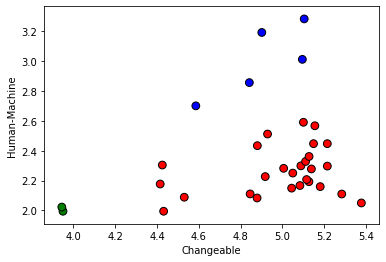

In [6]:
df_x = df[['Chgble','HM']].to_numpy()
dbscan = DBSCAN(eps=0.35, min_samples=2) # 0.36부터 single group

picture(df_x, dbscan, "Changeable", "Human-Machine")

In [5]:
def picture(df_x, dbscan, x, y):
    clusters = dbscan.fit_predict(df_x)
    print("클러스터 class:", np.unique(clusters))
    print("클러스터 레이블:\n", clusters)

    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print()
    print("SNS")
    LABEL_COLOR_MAP = {-1: 'w',
                       0 : 'r',
                       1 : 'b',
                       2 : 'g',
                       3 : 'c',
                       4 : 'y',
                       5 : 'pink',
                       6 : 'k'}

    label_color = [LABEL_COLOR_MAP[l] for l in clusters]

    plt.scatter(df_x[:,0], df_x[:,1], c=label_color, cmap=mglearn.cm2, s=60, edgecolors='black')

    plt.xlabel(x)
    plt.ylabel(y)
    df_clusters = pd.DataFrame(clusters)
    writer = pd.ExcelWriter("SNS_"+x+"_"+y+".xlsx", engine='xlsxwriter')
    df_clusters.to_excel(writer)
    writer.save() 


In [6]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

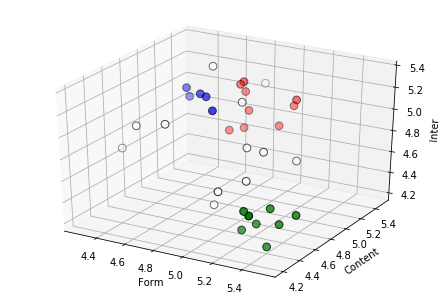

In [58]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_x[:,0], df_x[:,1], df_x[:,2],c=label_color, cmap=mglearn.cm2, s=60, edgecolors='black');

ax.set_xlabel('Form')
ax.set_ylabel('Content')
ax.set_zlabel('Inter')

pyplot.show()